In [10]:
# import packages
import numpy as np
import pandas as pd
import math 
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)  # None means no limit
pd.set_option('display.max_rows', None) 


# import data
df = pd.read_csv('../Data/large_validation.csv')
selected_columns = ['water', 'map_temperature', 'map_HZ', 'map_star_age', 'C12_stability', 'HUI_PROSTOI', 'PHI', 'ESI']
df = df[selected_columns]
#display data
# print(df)


1. COMPARE DESCRIPTIVE STATISTICS

In [ ]:
descriptive_stats = df.describe()
# print(descriptive_stats)

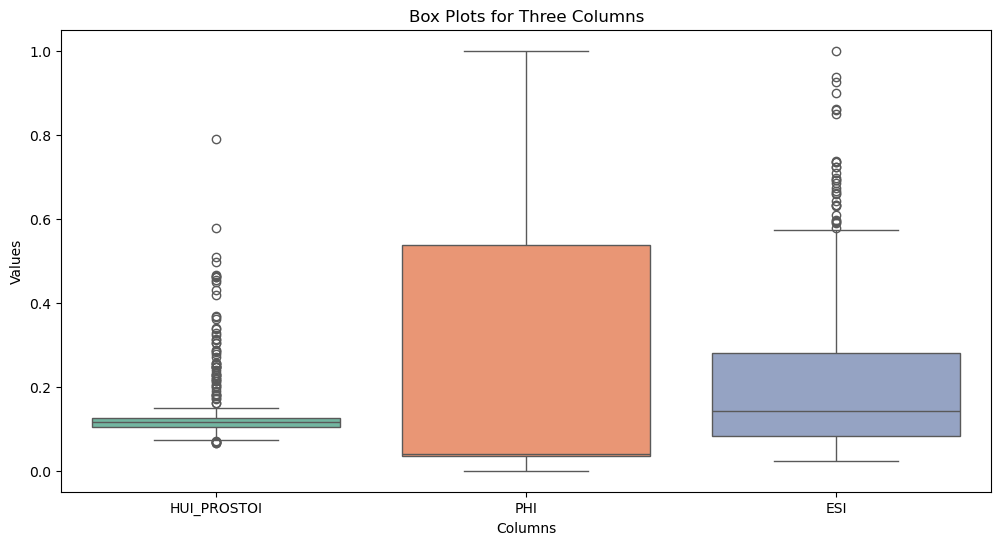

In [12]:
indices_col = ['HUI_PROSTOI', 'PHI', 'ESI']
i_df = df[indices_col]

plt.figure(figsize=(12, 6))
sns.boxplot(data=i_df, palette="Set2")

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plots for Three Columns')

# Display the plot
plt.show()

2. COMPARE CORRELATION

              HUI_PROSTOI           PHI           ESI
HUI_PROSTOI           NaN  6.418201e-20  9.192696e-87
PHI          6.418201e-20           NaN  7.230368e-66
ESI          9.192696e-87  7.230368e-66           NaN


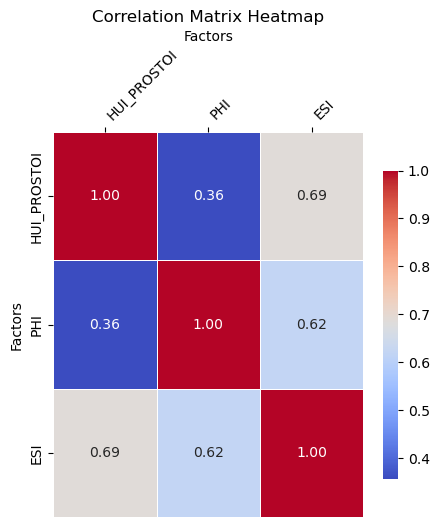

             HUI_PROSTOI       PHI       ESI
HUI_PROSTOI     1.000000  0.358053  0.687747
PHI             0.358053  1.000000  0.618868
ESI             0.687747  0.618868  1.000000


In [15]:
import scipy.stats as stats
from scipy.special import betainc

numeric_data_cor = i_df.select_dtypes(include=[np.number])
correlation_matrix = i_df.corr()

def calculate_p_value(r,n):
    df = n - 2
    t_squared = r**2 * (df/(1-r**2))
    p_value = betainc(0.5 * df, 0.5, df/(df + t_squared))
    return p_value


p_values = pd.DataFrame(np.zeros((numeric_data_cor.shape[1], numeric_data_cor.shape[1])), columns=numeric_data_cor.columns, index=numeric_data_cor.columns)

for col1 in numeric_data_cor.columns:
    for col2 in numeric_data_cor.columns:
        if col1 != col2:
            # Calculate Pearson correlation
            r = correlation_matrix.loc[col1, col2]
            # Number of observations
            n = numeric_data_cor.shape[0]
            # Calculate p-value
            p_val = calculate_p_value(r, n)
            p_values.loc[col1, col2] = p_val
        else:
            p_values.loc[col1, col2] = np.nan  # or 1, since a variable is perfectly correlated with itself


print(p_values)
plt.figure(figsize=(5, 5))  # Set the size of the plot
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})
heatmap.xaxis.set_ticks_position('top')
heatmap.xaxis.set_label_position('top')  # Move the x-axis label to the top
plt.xticks(rotation=45, ha='left') 

# Add title and labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Factors')
plt.ylabel('Factors')

# Display the plot
plt.show()
print(correlation_matrix)

3. Principal Component Analysis (PCA) ??? THIS MIGHT HAVE TO BE DONE FOR PARTS OF THE INDEX. READ!!!

In [20]:
from sklearn.decomposition import PCA
import numpy as np

# Standardize the data
df_standardized = (i_df - i_df.mean()) / i_df.std()

# Fit PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_standardized)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
print(pca_df)


explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio}')

# Cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(f'Cumulative Explained Variance Ratio: {cumulative_explained_variance}')

          PC1       PC2       PC3
0   -1.309448 -0.237995  0.096532
1    2.135014  0.781561  0.962267
2    0.202400 -1.488015 -0.654120
3   -1.221834 -0.267041  0.160599
4   -1.057808 -0.386543 -0.135364
5    1.036494  0.713965  0.251924
6    2.384782  0.503242  0.757804
7    3.332628 -0.032371  0.377050
8   -1.176245 -0.248594  0.260384
9   -0.270147 -1.075271 -0.429255
10  -1.294328 -0.291117  0.016280
11   0.235043 -0.800823  1.125368
12  -0.421130 -0.587632  0.326725
13  -0.993680 -0.241909  0.529345
14   0.612146  0.748597 -0.268350
15  -1.239025 -0.057618  0.177786
16  -1.081234 -0.422558 -0.262427
17  -1.018898 -0.450367 -0.230987
18  -1.288994 -0.066376  0.091108
19  -1.397597 -0.174132  0.100658
20   2.590122  0.407559  0.853296
21  -1.293051 -0.207729 -0.194392
22  -1.550826 -0.177586 -0.095408
23   2.409154  0.707264  1.195572
24   1.771394  1.107701  1.103429
25   1.130296  0.977669 -0.043639
26   0.000955 -0.676511  0.736454
27   4.819154 -2.080784 -0.566946
28  -0.677804 

4. ERROR METRICS - READ HOW TO INTERPRET

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and MSE
mae = mean_absolute_error(i_df['HUI_PROSTOI'], i_df['ESI'])
mse = mean_squared_error(i_df['HUI_PROSTOI'], i_df['ESI'])
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.10902263395179276
Mean Squared Error: 0.025237093637737518


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and MSE
mae = mean_absolute_error(i_df['HUI_PROSTOI'], i_df['PHI'])
mse = mean_squared_error(i_df['HUI_PROSTOI'], i_df['PHI'])
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.2256129871641606
Mean Squared Error: 0.08629075636007423


5. CONSISTENCY STABILITY AND VOLATILITY ANALYSIS - READ HOW TO INTERPRET

C:\Users\21sko\AppData\Local\Temp\ipykernel_12196\2153560445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['HUI_volatility'] = i_df['HUI_PROSTOI'].rolling(window=5).std()
C:\Users\21sko\AppData\Local\Temp\ipykernel_12196\2153560445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_df['ESI_volatility'] = i_df['ESI'].rolling(window=5).std()
C:\Users\21sko\AppData\Local\Temp\ipykernel_12196\2153560445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

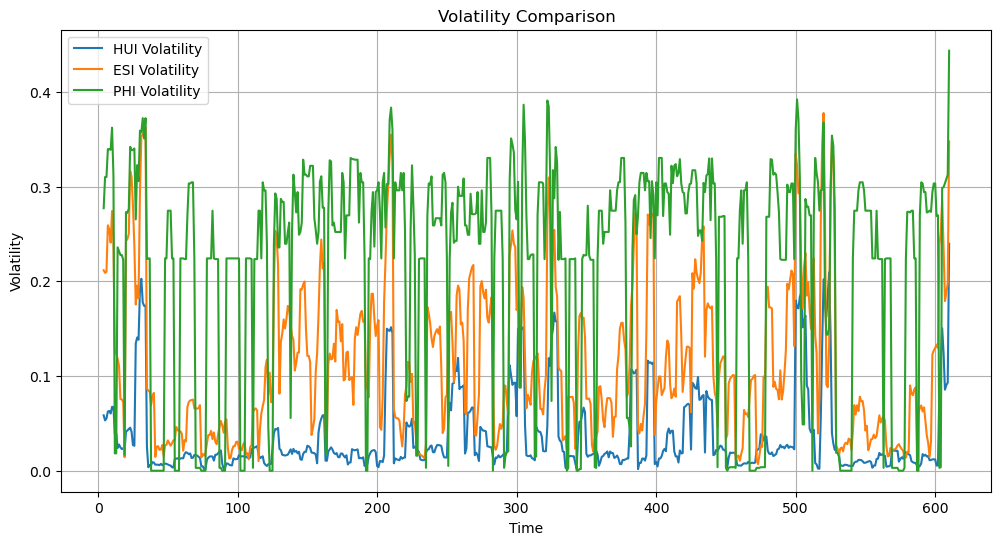

In [28]:
i_df['HUI_volatility'] = i_df['HUI_PROSTOI'].rolling(window=5).std()
i_df['ESI_volatility'] = i_df['ESI'].rolling(window=5).std()
i_df['PHI_volatility'] = i_df['PHI'].rolling(window=5).std()

plt.figure(figsize=(12, 6))
plt.plot(i_df['HUI_volatility'], label='HUI Volatility')
plt.plot(i_df['ESI_volatility'], label='ESI Volatility')
plt.plot(i_df['PHI_volatility'], label='PHI Volatility')
plt.title('Volatility Comparison')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()